In [28]:
import numpy as np
import os
import sys
import inspect
import matplotlib.pyplot as plt
import const
current_dir =  os.path.abspath(os.path.dirname('__file__'))
fpath = os.path.abspath(current_dir + "/../")
sys.path.append(fpath)

In [33]:
# from environment_mod import *

from environment_mod import geo2geod
# inspect.getfullargspec(geo2geod) 

from environment_mod import Bmag_dipole, cyclotron, f_lower_hybrid,omega_lower_hybrid,omega_upper_hybrid, omega_plasma
from environment_mod import densities_denton
inspect.getfullargspec(Bmag_dipole) 

FullArgSpec(args=['L_arg', 'lamda_arg'], varargs=None, varkw=None, defaults=None, kwonlyargs=[], kwonlydefaults=None, annotations={})

In [34]:
lat_geo = np.arange(-60,60,0.1)
lon_geo = np.empty(len(lat_geo))
lon_geo.fill(0)
alt_geo = np.empty(len(lat_geo))
alt_geo.fill(1000)
tmp=geo2geod(lat_geo,lon_geo,alt_geo)


#### Magnetic field along a field line

In [35]:
L_shell=4
Bmag=Bmag_dipole(L_shell,np.deg2rad(lat_geo))

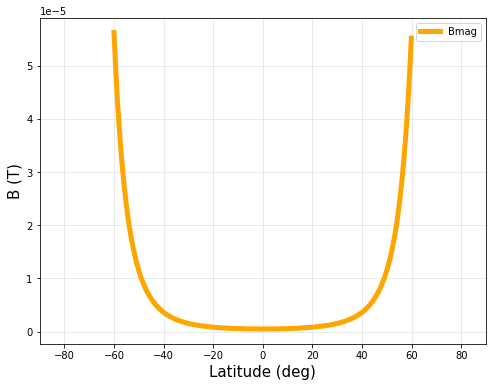

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
s=5
fonts=15
ax.plot(lat_geo,Bmag,c='orange',label='Bmag',linewidth=s)

ax.grid(alpha=.3)
ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'B (T)',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

### frequencies

In [42]:
wce=cyclotron(Bmag,const.qe,const.me)[0]
wcH=cyclotron(Bmag,const.qi,const.mH)[0]
ne0=10*10**(-6)
ne=densities_denton(ne0,np.deg2rad(lat_geo))
wpe=omega_plasma(ne,const.qe,const.me)[0]
wpH=omega_plasma(ne,const.qi,const.mH)[0]

wuhr=omega_upper_hybrid(wce,wpe,wcH,wpH)
wlhr=omega_lower_hybrid(wce,wpe,wcH,wpH)

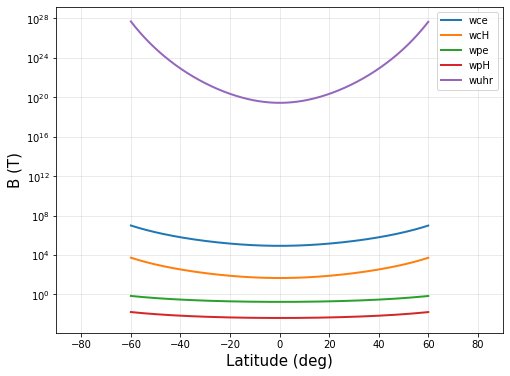

In [48]:
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15
ax.plot(lat_geo,wce,label='wce',linewidth=s)
ax.plot(lat_geo,wcH,label='wcH',linewidth=s)
ax.plot(lat_geo,wpe,label='wpe',linewidth=s)
ax.plot(lat_geo,wpH,label='wpH',linewidth=s)
ax.plot(lat_geo,wuhr,label='wuhr',linewidth=s)
# ax.plot(lat_geo,wlhr,label='wlhr',linewidth=s)

ax.set_yscale('log')
ax.grid(alpha=.3)
ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'B (T)',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()